In [1]:
import gdown
import zipfile
import os
url = "https://drive.google.com/uc?id=1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182"
output = 'Penyisiha_Hology_Data_Mining.zip'
gdown.download(url, output, quiet=False)
with zipfile.ZipFile(output, 'r') as zip_ref:
  zip_ref.extractall()
os.remove(output)

Downloading...
From: https://drive.google.com/uc?id=1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182
To: /content/Penyisiha_Hology_Data_Mining.zip
100%|██████████| 10.2M/10.2M [00:00<00:00, 146MB/s]


Device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


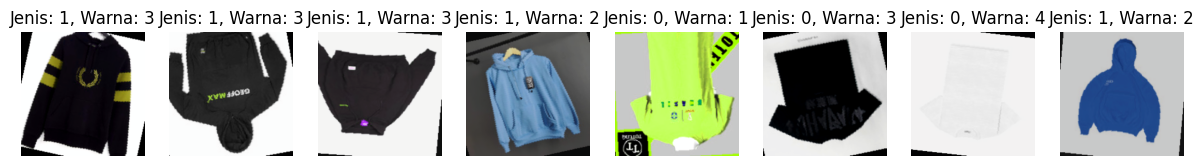

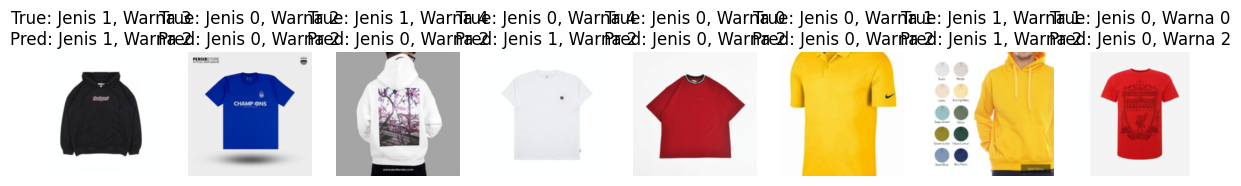

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/15], Train Loss: 2.2863, Val Loss: 2.1261
New best model found at epoch 1, saving the model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/15], Train Loss: 1.9734, Val Loss: 2.9412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/15], Train Loss: 2.0176, Val Loss: 1.8493
New best model found at epoch 3, saving the model...
Epoch [4/15], Train Loss: 1.7859, Val Loss: 1.3445
New best model found at epoch 4, saving the model...
Epoch [5/15], Train Loss: 1.4839, Val Loss: 1.3240
New best model found at epoch 5, saving the model...
Epoch [6/15], Train Loss: 1.4501, Val Loss: 1.1378
New best model found at epoch 6, saving the model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/15], Train Loss: 1.4966, Val Loss: 1.2877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/15], Train Loss: 1.3459, Val Loss: 1.0856
New best model found at epoch 8, saving the model...
Epoch [9/15], Train Loss: 1.2850, Val Loss: 1.1026
Epoch [10/15], Train Loss: 1.2035, Val Loss: 1.0788
New best model found at epoch 10, saving the model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [11/15], Train Loss: 1.2220, Val Loss: 1.0678
New best model found at epoch 11, saving the model...
Epoch [12/15], Train Loss: 1.2155, Val Loss: 1.0064
New best model found at epoch 12, saving the model...
Epoch [13/15], Train Loss: 1.1733, Val Loss: 1.0197
Epoch [14/15], Train Loss: 1.1607, Val Loss: 1.0591
Epoch [15/15], Train Loss: 1.2078, Val Loss: 0.9903
New best model found at epoch 15, saving the model...
Best model saved.


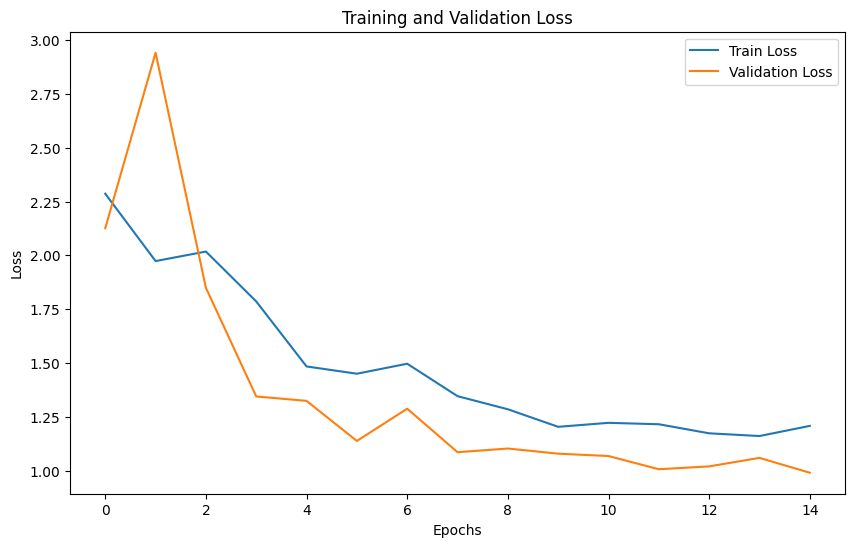

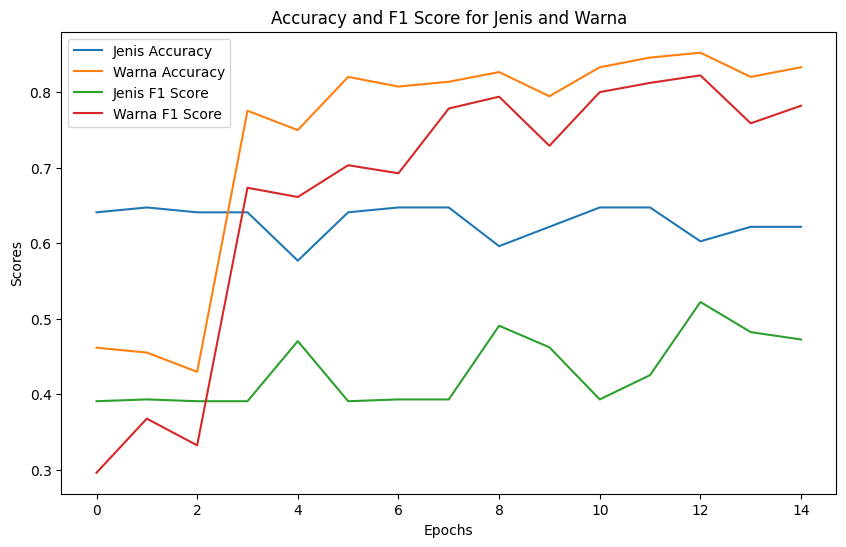

In [2]:

# Cell 1: Imports and Setup
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score
import numpy as np
import matplotlib.pyplot as plt

# Define device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

# Cell 2: Paths and Data Loading
train_img_folder = '/content/Penyisihan Hology Data Mining/train'  # Update with the path to your train folder
csv_file = '/content/Penyisihan Hology Data Mining/train.csv'  # Update with the path to your train.csv

# Load train.csv
train_df = pd.read_csv(csv_file)

# Cell 3: Data Augmentation and Preprocessing
IMG_SIZE = (224, 224)

# Augmentation for training
data_transforms_train = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Preprocessing for validation
data_transforms_val = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cell 4: Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_id = self.dataframe.iloc[idx]['id']
        jenis_label = self.dataframe.iloc[idx]['jenis']
        warna_label = self.dataframe.iloc[idx]['warna']

        img_path = None
        try:
            img_extensions = ['.jpg', '.JPG', '.png']  # Handle multiple extensions
            for ext in img_extensions:
                potential_path = os.path.join(self.img_dir, f"{img_id}{ext}")
                if os.path.exists(potential_path):
                    img_path = potential_path
                    break
            if img_path:
                image = Image.open(img_path).convert('RGB')
            else:
                print(f"Image {img_id} not found.")
                image = Image.new('RGB', IMG_SIZE)

        except Exception as e:
            print(f"Error loading image {img_id}: {str(e)}")
            image = Image.new('RGB', IMG_SIZE)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(jenis_label, dtype=torch.long), torch.tensor(warna_label, dtype=torch.long)

# Cell 5: Data Splitting and Sampler Setup
# Split the data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Compute class weights for 'jenis' and 'warna' based on their frequencies
def compute_class_weights(dataframe, column):
    class_counts = dataframe[column].value_counts().sort_index().values
    class_weights = 1. / class_counts
    return class_weights

# Get weights for 'jenis' and 'warna'
jenis_weights = compute_class_weights(train_df, 'jenis')
warna_weights = compute_class_weights(train_df, 'warna')

# Compute sample weights for each row in the dataframe
sample_weights = []
for idx in range(len(train_df)):
    jenis_label = train_df.iloc[idx]['jenis']
    warna_label = train_df.iloc[idx]['warna']
    sample_weight = jenis_weights[jenis_label] + warna_weights[warna_label]
    sample_weights.append(sample_weight)

# Create a sampler for balanced dataset
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Cell 6: Dataset and Dataloader
# Create dataset and dataloaders
train_dataset = CustomImageDataset(train_df, train_img_folder, transform=data_transforms_train)
val_dataset = CustomImageDataset(val_df, train_img_folder, transform=data_transforms_val)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Cell 7: Model Setup
# Load VGG16 pretrained on ImageNet
model = models.vgg16(pretrained=True)

# Modify the classifier to output 2 classes for 'jenis' and 5 classes for 'warna'
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 7)  # 2 for jenis + 5 for warna
)

# Move model to GPU if available
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Implement Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Cell 8: Plotting Losses and Metrics
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_metrics(metrics_list):
    accuracy_jenis = [m['accuracy_jenis'] for m in metrics_list]
    accuracy_warna = [m['accuracy_warna'] for m in metrics_list]
    f1_jenis = [m['f1_jenis'] for m in metrics_list]
    f1_warna = [m['f1_warna'] for m in metrics_list]

    plt.figure(figsize=(10, 6))
    plt.plot(accuracy_jenis, label='Jenis Accuracy')
    plt.plot(accuracy_warna, label='Warna Accuracy')
    plt.plot(f1_jenis, label='Jenis F1 Score')
    plt.plot(f1_warna, label='Warna F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('Scores')
    plt.title('Accuracy and F1 Score for Jenis and Warna')
    plt.legend()
    plt.show()

# Cell 9: Model Training and Evaluation Functions
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels_jenis = []
    all_labels_warna = []

    with torch.no_grad():
        for images, jenis_labels, warna_labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            jenis_outputs = outputs[:, :2].cpu().numpy()
            warna_outputs = outputs[:, 2:].cpu().numpy()

            all_preds.append(np.concatenate([jenis_outputs, warna_outputs], axis=1))
            all_labels_jenis.append(jenis_labels.cpu().numpy())
            all_labels_warna.append(warna_labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels_jenis = np.hstack(all_labels_jenis)
    all_labels_warna = np.hstack(all_labels_warna)

    preds_jenis = np.argmax(all_preds[:, :2], axis=1)
    preds_warna = np.argmax(all_preds[:, 2:], axis=1)

    accuracy_jenis = accuracy_score(all_labels_jenis, preds_jenis)
    accuracy_warna = accuracy_score(all_labels_warna, preds_warna)

    precision_jenis = precision_score(all_labels_jenis, preds_jenis, average='macro')
    precision_warna = precision_score(all_labels_warna, preds_warna, average='macro')

    recall_jenis = recall_score(all_labels_jenis, preds_jenis, average='macro')
    recall_warna = recall_score(all_labels_warna, preds_warna, average='macro')

    f1_jenis = f1_score(all_labels_jenis, preds_jenis, average='macro')
    f1_warna = f1_score(all_labels_warna, preds_warna, average='macro')

    hamming = hamming_loss(np.hstack([all_labels_jenis, all_labels_warna]), np.hstack([preds_jenis, preds_warna]))

    jaccard_jenis = jaccard_score(all_labels_jenis, preds_jenis, average='macro')
    jaccard_warna = jaccard_score(all_labels_warna, preds_warna, average='macro')

    return {
        'accuracy_jenis': accuracy_jenis,
        'accuracy_warna': accuracy_warna,
        'precision_jenis': precision_jenis,
        'precision_warna': precision_warna,
        'recall_jenis': recall_jenis,
        'recall_warna': recall_warna,
        'f1_jenis': f1_jenis,
        'f1_warna': f1_warna,
        'hamming_loss': hamming,
        'jaccard_jenis': jaccard_jenis,
        'jaccard_warna': jaccard_warna
    }

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    train_losses = []
    val_losses = []
    metrics_list = []
    best_val_loss = float('inf')
    best_model_wts = None

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, jenis_labels, warna_labels in train_loader:
            images, jenis_labels, warna_labels = images.to(device), jenis_labels.to(device), warna_labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            jenis_outputs = outputs[:, :2]
            warna_outputs = outputs[:, 2:]

            jenis_loss = criterion(jenis_outputs, jenis_labels)
            warna_loss = criterion(warna_outputs, warna_labels)
            loss = jenis_loss + warna_loss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        val_loss = 0.0
        with torch.no_grad():
            for images, jenis_labels, warna_labels in val_loader:
                images, jenis_labels, warna_labels = images.to(device), jenis_labels.to(device), warna_labels.to(device)
                outputs = model(images)
                jenis_outputs = outputs[:, :2]
                warna_outputs = outputs[:, 2:]

                jenis_loss = criterion(jenis_outputs, jenis_labels)
                warna_loss = criterion(warna_outputs, warna_labels)
                val_loss += (jenis_loss + warna_loss).item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        metrics = evaluate_model(model, val_loader)
        metrics_list.append(metrics)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = model.state_dict().copy()
            print(f"New best model found at epoch {epoch+1}, saving the model...")

        scheduler.step()

    if best_model_wts is not None:
        torch.save(best_model_wts, './best_vgg_multilabel_model.pth')
        print("Best model saved.")
    else:
        print("No improvement during training.")

    return train_losses, val_losses, metrics_list

# Cell 10: Visualize Augmented Images
def visualize_augmented_images(loader, num_images=8):
    batch = next(iter(loader))
    images, jenis_labels, warna_labels = batch

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        img = images[i].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
        img = np.clip(img, 0, 1)  # Clip values for valid image display

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'Jenis: {jenis_labels[i]}, Warna: {warna_labels[i]}')
        plt.axis('off')
    plt.show()

# Call this function before the training loop to visualize the augmented images
visualize_augmented_images(train_loader)

# Cell 11: Visualize Predictions
def visualize_predictions(model, loader, num_images=8):
    model.eval()
    batch = next(iter(loader))
    images, true_jenis_labels, true_warna_labels = batch
    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)

    preds_jenis = torch.argmax(outputs[:, :2], dim=1).cpu().numpy()
    preds_warna = torch.argmax(outputs[:, 2:], dim=1).cpu().numpy()

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'True: Jenis {true_jenis_labels[i]}, Warna {true_warna_labels[i]}\n'
                  f'Pred: Jenis {preds_jenis[i]}, Warna {preds_warna[i]}')
        plt.axis('off')
    plt.show()

# Call this function after training to visualize predictions
visualize_predictions(model, val_loader)

# Cell 12: Training the Model and Visualizing Results
train_losses, val_losses, metrics_list = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=15
)

# Plot the results
plot_losses(train_losses, val_losses)
plot_metrics(metrics_list)


Device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 86.5MB/s]


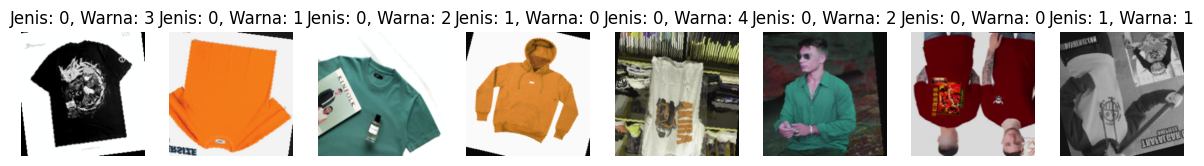

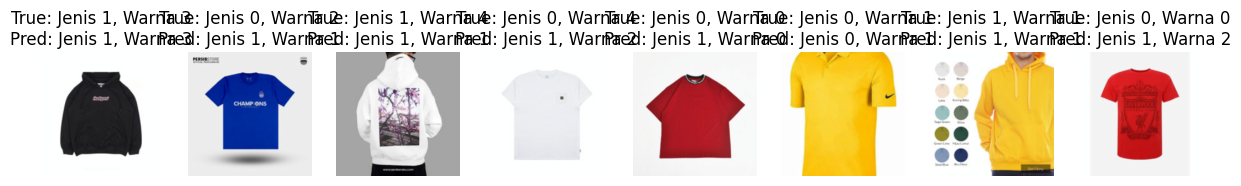

Epoch [1/15], Train Loss: 1.2698, Val Loss: 0.5587
New best model found at epoch 1, saving the model...
Epoch [2/15], Train Loss: 0.7894, Val Loss: 0.5859
Epoch [3/15], Train Loss: 0.7208, Val Loss: 0.5343
New best model found at epoch 3, saving the model...
Epoch [4/15], Train Loss: 0.6619, Val Loss: 0.8335
Epoch [5/15], Train Loss: 0.6430, Val Loss: 0.7385
Epoch [6/15], Train Loss: 0.6091, Val Loss: 0.4373
New best model found at epoch 6, saving the model...
Epoch [7/15], Train Loss: 0.5914, Val Loss: 0.4179
New best model found at epoch 7, saving the model...
Epoch [8/15], Train Loss: 0.4594, Val Loss: 0.3420
New best model found at epoch 8, saving the model...
Epoch [9/15], Train Loss: 0.3687, Val Loss: 0.3305
New best model found at epoch 9, saving the model...
Epoch [10/15], Train Loss: 0.3660, Val Loss: 0.3230
New best model found at epoch 10, saving the model...
Epoch [11/15], Train Loss: 0.3279, Val Loss: 0.3106
New best model found at epoch 11, saving the model...
Epoch [12/1

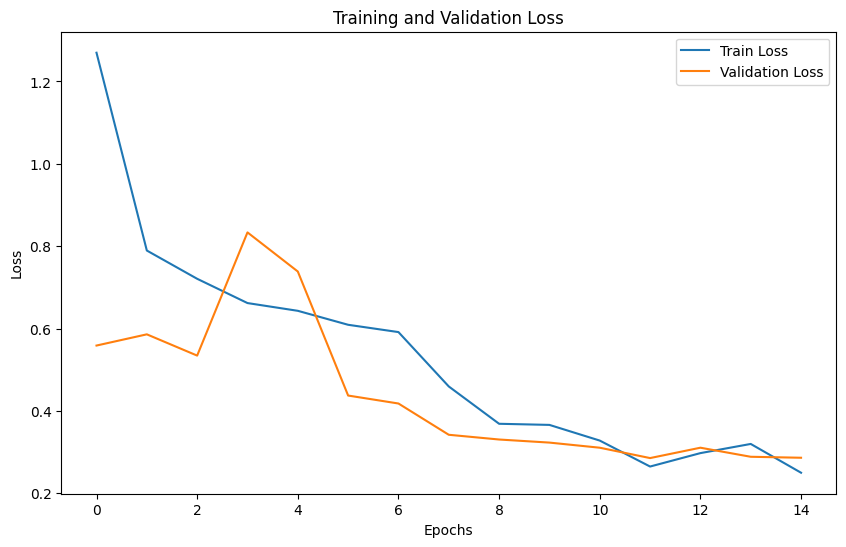

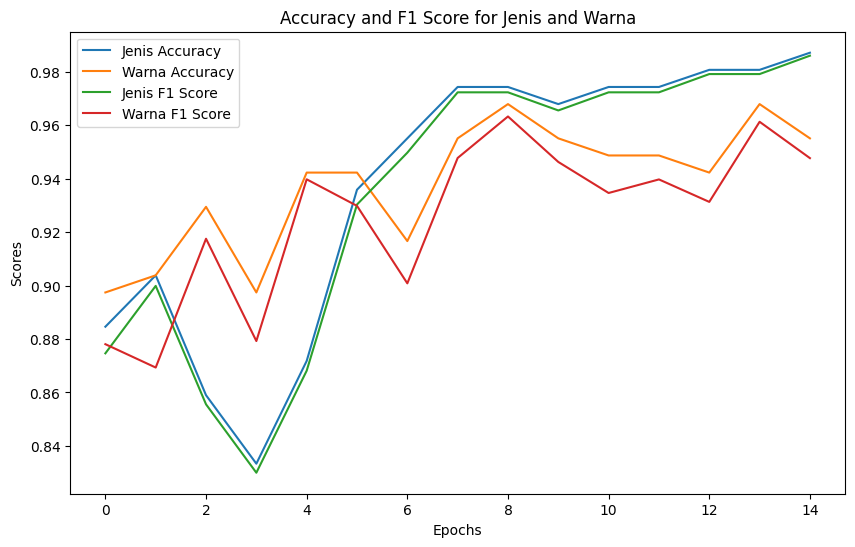

In [3]:


# Cell 1: Imports and Setup
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score
import numpy as np
import matplotlib.pyplot as plt

# Define device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

# Cell 2: Paths and Data Loading
train_img_folder = '/content/Penyisihan Hology Data Mining/train'  # Update with the path to your train folder
csv_file = '/content/Penyisihan Hology Data Mining/train.csv'  # Update with the path to your train.csv

# Load train.csv
train_df = pd.read_csv(csv_file)

# Cell 3: Data Augmentation and Preprocessing
IMG_SIZE = (224, 224)

# Augmentation for training
data_transforms_train = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Preprocessing for validation
data_transforms_val = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cell 4: Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_id = self.dataframe.iloc[idx]['id']
        jenis_label = self.dataframe.iloc[idx]['jenis']
        warna_label = self.dataframe.iloc[idx]['warna']

        img_path = None
        try:
            img_extensions = ['.jpg', '.JPG', '.png']  # Handle multiple extensions
            for ext in img_extensions:
                potential_path = os.path.join(self.img_dir, f"{img_id}{ext}")
                if os.path.exists(potential_path):
                    img_path = potential_path
                    break
            if img_path:
                image = Image.open(img_path).convert('RGB')
            else:
                print(f"Image {img_id} not found.")
                image = Image.new('RGB', IMG_SIZE)

        except Exception as e:
            print(f"Error loading image {img_id}: {str(e)}")
            image = Image.new('RGB', IMG_SIZE)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(jenis_label, dtype=torch.long), torch.tensor(warna_label, dtype=torch.long)

# Cell 5: Data Splitting and Sampler Setup
# Split the data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Compute class weights for 'jenis' and 'warna' based on their frequencies
def compute_class_weights(dataframe, column):
    class_counts = dataframe[column].value_counts().sort_index().values
    class_weights = 1. / class_counts
    return class_weights

# Get weights for 'jenis' and 'warna'
jenis_weights = compute_class_weights(train_df, 'jenis')
warna_weights = compute_class_weights(train_df, 'warna')

# Compute sample weights for each row in the dataframe
sample_weights = []
for idx in range(len(train_df)):
    jenis_label = train_df.iloc[idx]['jenis']
    warna_label = train_df.iloc[idx]['warna']
    sample_weight = jenis_weights[jenis_label] + warna_weights[warna_label]
    sample_weights.append(sample_weight)

# Create a sampler for balanced dataset
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Cell 6: Dataset and Dataloader
# Create dataset and dataloaders
train_dataset = CustomImageDataset(train_df, train_img_folder, transform=data_transforms_train)
val_dataset = CustomImageDataset(val_df, train_img_folder, transform=data_transforms_val)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Cell 7: Model Setup
# Load ResNeXt50_32x4d pretrained on ImageNet
model = models.resnext50_32x4d(pretrained=True)

# Modify the classifier to output 2 classes for 'jenis' and 5 classes for 'warna'
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 7)  # 2 for jenis + 5 for warna
)

# Move model to GPU if available
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Implement Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Cell 8: Plotting Losses and Metrics
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_metrics(metrics_list):
    accuracy_jenis = [m['accuracy_jenis'] for m in metrics_list]
    accuracy_warna = [m['accuracy_warna'] for m in metrics_list]
    f1_jenis = [m['f1_jenis'] for m in metrics_list]
    f1_warna = [m['f1_warna'] for m in metrics_list]

    plt.figure(figsize=(10, 6))
    plt.plot(accuracy_jenis, label='Jenis Accuracy')
    plt.plot(accuracy_warna, label='Warna Accuracy')
    plt.plot(f1_jenis, label='Jenis F1 Score')
    plt.plot(f1_warna, label='Warna F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('Scores')
    plt.title('Accuracy and F1 Score for Jenis and Warna')
    plt.legend()
    plt.show()

# Cell 9: Model Training and Evaluation Functions
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels_jenis = []
    all_labels_warna = []

    with torch.no_grad():
        for images, jenis_labels, warna_labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            jenis_outputs = outputs[:, :2].cpu().numpy()
            warna_outputs = outputs[:, 2:].cpu().numpy()

            all_preds.append(np.concatenate([jenis_outputs, warna_outputs], axis=1))
            all_labels_jenis.append(jenis_labels.cpu().numpy())
            all_labels_warna.append(warna_labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels_jenis = np.hstack(all_labels_jenis)
    all_labels_warna = np.hstack(all_labels_warna)

    preds_jenis = np.argmax(all_preds[:, :2], axis=1)
    preds_warna = np.argmax(all_preds[:, 2:], axis=1)

    accuracy_jenis = accuracy_score(all_labels_jenis, preds_jenis)
    accuracy_warna = accuracy_score(all_labels_warna, preds_warna)

    precision_jenis = precision_score(all_labels_jenis, preds_jenis, average='macro')
    precision_warna = precision_score(all_labels_warna, preds_warna, average='macro')

    recall_jenis = recall_score(all_labels_jenis, preds_jenis, average='macro')
    recall_warna = recall_score(all_labels_warna, preds_warna, average='macro')

    f1_jenis = f1_score(all_labels_jenis, preds_jenis, average='macro')
    f1_warna = f1_score(all_labels_warna, preds_warna, average='macro')

    hamming = hamming_loss(np.hstack([all_labels_jenis, all_labels_warna]), np.hstack([preds_jenis, preds_warna]))

    jaccard_jenis = jaccard_score(all_labels_jenis, preds_jenis, average='macro')
    jaccard_warna = jaccard_score(all_labels_warna, preds_warna, average='macro')

    return {
        'accuracy_jenis': accuracy_jenis,
        'accuracy_warna': accuracy_warna,
        'precision_jenis': precision_jenis,
        'precision_warna': precision_warna,
        'recall_jenis': recall_jenis,
        'recall_warna': recall_warna,
        'f1_jenis': f1_jenis,
        'f1_warna': f1_warna,
        'hamming_loss': hamming,
        'jaccard_jenis': jaccard_jenis,
        'jaccard_warna': jaccard_warna
    }

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    train_losses = []
    val_losses = []
    metrics_list = []
    best_val_loss = float('inf')
    best_model_wts = None

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, jenis_labels, warna_labels in train_loader:
            images, jenis_labels, warna_labels = images.to(device), jenis_labels.to(device), warna_labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            jenis_outputs = outputs[:, :2]
            warna_outputs = outputs[:, 2:]

            jenis_loss = criterion(jenis_outputs, jenis_labels)
            warna_loss = criterion(warna_outputs, warna_labels)
            loss = jenis_loss + warna_loss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        val_loss = 0.0
        with torch.no_grad():
            for images, jenis_labels, warna_labels in val_loader:
                images, jenis_labels, warna_labels = images.to(device), jenis_labels.to(device), warna_labels.to(device)
                outputs = model(images)
                jenis_outputs = outputs[:, :2]
                warna_outputs = outputs[:, 2:]

                jenis_loss = criterion(jenis_outputs, jenis_labels)
                warna_loss = criterion(warna_outputs, warna_labels)
                val_loss += (jenis_loss + warna_loss).item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        metrics = evaluate_model(model, val_loader)
        metrics_list.append(metrics)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_wts = model.state_dict().copy()
            print(f"New best model found at epoch {epoch+1}, saving the model...")

        scheduler.step()

    if best_model_wts is not None:
        torch.save(best_model_wts, './best_resnext_multilabel_model.pth')
        print("Best model saved.")
    else:
        print("No improvement during training.")

    return train_losses, val_losses, metrics_list

# Cell 10: Visualize Augmented Images
def visualize_augmented_images(loader, num_images=8):
    batch = next(iter(loader))
    images, jenis_labels, warna_labels = batch

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        img = images[i].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
        img = np.clip(img, 0, 1)  # Clip values for valid image display

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'Jenis: {jenis_labels[i]}, Warna: {warna_labels[i]}')
        plt.axis('off')
    plt.show()

# Call this function before the training loop to visualize the augmented images
visualize_augmented_images(train_loader)

# Cell 11: Visualize Predictions
def visualize_predictions(model, loader, num_images=8):
    model.eval()
    batch = next(iter(loader))
    images, true_jenis_labels, true_warna_labels = batch
    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)

    preds_jenis = torch.argmax(outputs[:, :2], dim=1).cpu().numpy()
    preds_warna = torch.argmax(outputs[:, 2:], dim=1).cpu().numpy()

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'True: Jenis {true_jenis_labels[i]}, Warna {true_warna_labels[i]}\n'
                  f'Pred: Jenis {preds_jenis[i]}, Warna {preds_warna[i]}')
        plt.axis('off')
    plt.show()

# Call this function after training to visualize predictions
visualize_predictions(model, val_loader)

# Cell 12: Training the Model and Visualizing Results
train_losses, val_losses, metrics_list = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=15
)

# Plot the results
plot_losses(train_losses, val_losses)
plot_metrics(metrics_list)
